# Report 4: Floating Point Numbers

## Jillian Annis

### Introduction

Storing and using floating point numbers on a computer uses an approximation because memory is limited, and relies on the binary system instead of the base 10 system that we use everyday.  Floating point number computations were standardized by the Institute of Electrical and Electronic Engineers (IEEE) in 1985, and all computers today use this standard.  A computer that runs a 64-bit operating system will have 64 bits available in memory to store a floating point number.  To convert to binary scientific notation, the formula is

$$(-1)^s * (1.mantissa) * 2^{exponent-bias}$$

for normalized numbers and 

$$(-1)^s * (0.mantissa) * 2^{1-bias}$$

for denormalized numbers.

The mantissa is the set of digits after the decimal point, and the "s" stands for the sign of the number.  The binary scientific notation shown above works exactly like scientific notation in base 10.

### Task Statement

In this report, the following will be determined:
* the machine epsilon
* smallest floating point number
* largest floating point number
* number of mantissa bits
* number of exponent bits
* the exponent bias
* if denormalization is used

After this, the function $F(x)=\frac{log(1+x)}{x}$ will be plotted close to zero, and its behavior near zero will be analyzed.  Then, the Taylor Series of F(x) will be determined and plotted along with the original function.  Finally, the magnitude of |x| in the Taylor Series will be found while maintaining a relative error of $10^{-16}$.

### Method and Results

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### Exercise 1: Find the Machine Epsilon

In [2]:
def findEpsilon():
    n=1
    x=2.**(-n)
    
    while 1+x!=1:
        n+=1
        x=2.**(-n)
        
    print(-(n-1)) #This is the base 2 exponent of the machine epsilon
    print(2.**(1-n)) 

In [3]:
findEpsilon()

-52
2.220446049250313e-16


The function **findEpsilon** was used to find the exponent of the machine epsilon, or the smallest number possible that can be added to 1 to give a number greater than 1.  We find this number by using the condition *while 1+x does not equal 1*.  As the exponent, -n, becomes increasingly negative, the number added to 1 becomes smaller and smaller.  At some point, the number becomes too small, and the last digit gets truncated by the computer to 0.  Therefore, we want to find the last number and its exponent before this truncation happens.

After executing the function, we find that -52 is the exponent of the machine epsilon.  Therefore, the machine epsilon is $2^{-52}$ in base 2, or $2.2204*10^{-16}$ in base 10.

In [4]:
#Infer the Values of M and E
M=52
E=64-1-M
print(E)

11


Since my computer is 64 bit, the number of bits reserved for both the mantissa, M, and the exponent, E, can be determined.  Since the epsilon is the smallest number that can be added to 1, and its exponent is -52, the number of bits for the mantissa must be 52.

Therefore, the bits reserved for the exponent is just the 64 total bits minus the number of mantissa bits minus 1 bit for the sign of the number.  From this, the number of bits for the exponent is 11.

#### Exercise 2: Find the Largest Floating Point Number

In [5]:
def findLargest():
    n=1
    while True:
        try:
            x=2.**n
            n+=1
        except:
            print(n-1) #largest exponent in base 2
            break

In [6]:
findLargest()

1023


To find the largest floating point, we continually increase the exponent until it is no longer possible.  The largest exponent is the exponent that occurs right before an overflow error is returned (the overflow error means that the number is too large).  The **findLargest** function does just that.  Because an error signals the largests possible exponent, we must use the try/except argument.  As long as the while loop holds true (there is no overflow error), Jupyter "tries" (or executes) the code underneath the try statement. This results in $2^n$ being calculated and the exponent, n, being increased by 1.  When  $2^n$ becomes too large, Jupyter skips the rest of the code in the try statement (the n+=1 part) and goes to the except statement and executes this code, thus printing the exponent before this error.

When the function is called, the largest exponent is found to be 1023, and so the largest number is $2^{1023}$.

#### Exercise 3: Find the Smallest Floating Point Number

In [7]:
def findSmallest():
    n=1
    x=2.**n

    while x!=0:
        n-=1
        x=2.**n
    
    print(n+1) #this is the exponent in base two of the smallest number

In [8]:
findSmallest()

-1075


To find the smallest floating point, the smallest exponent must be determined.  Similarly to the way the machine epsilon was found, the smallest exponent will also be found by making the exponent as small as possible.  In the **findSmallest** function, the while loop will run until $2^n$ becomes so small that it is truncated to 0.  Thus, the desired exponent is the one before the truncation occurs.  Since n is negative, we add 1 to n to get the smallest exponent.

After calling the function, the smallest exponent is determined to be -1075.  The smallest number is $2^{-1075}$.

In [9]:
#Infer the value of the Bias, B
B=1-(-1075)-M
print(B)

1024


We now have enough information to determine the Bias, B, used for the exponent.  The smallest floating point number has a value of $2^{1-Bias-M}$ (as derived in class).  Therefore, the exponent is $1-Bias-M$, or $E=1-B-M$.  Rearranging this, we find that $B=1-E-M$.  Using the values of M=52 and E=-1075, the Bias is determined to be 1024.  This means that 1024 is added to the exponent before it is stored.

Is denormalization used? Yes!

Since the number of bits designated to the exponent, E, was determined to be 11, there are $2^{11}$, or 2048, possible exponents.  However, the actual number of exponents is the range between the largest and smallest exponents possible, $1023 + 1075 = 2098$.

Obviously, the two numbers are not equal, and they differ by 50 exponents.  Therefore, this difference of 50 exponents is accounted for by the use of denormalized numbers.

#### Exercise 4: Plot Function, F(x), Close to Zero

For this exercise, we must plot the function $F(x)=\frac{log(1+x)}{x}$ close to zero, and observe and describe the behavior of the function near zero.  The code below plots F(x) near zero.

The x values range from $-1*10^{-7}$ to $1*10^{-7}$, and $1*10^{-7}$ is set as the variable endValue so that this small number does not have to be continuously typed.  When defining the x values, linspace is used to create 1001 points between the -endValue and the +endValue.  

Because F(x) has a discontinuity at x=0 (cannot divide by x), the *where* argument is used to define the y values.  This argument means that when x equals 0, y equals 1, and everywhere else y equals F(x).  

After defining what x and y are, they are plotted onto a figure of size 10 by 10.  The argument plt.ticklabel_format() is used to get rid of the overflow from using scientific notation to define the range of each axis.  *useOffset=False* turns off the overflow on the y axis, and *style='plain'* turns off the overflow on the x axis.

(Side Note: on the y axis, the overflow is called the offset; on the x, it is called the multiplier)

C:\Users\Jillian\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: invalid value encountered in true_divide


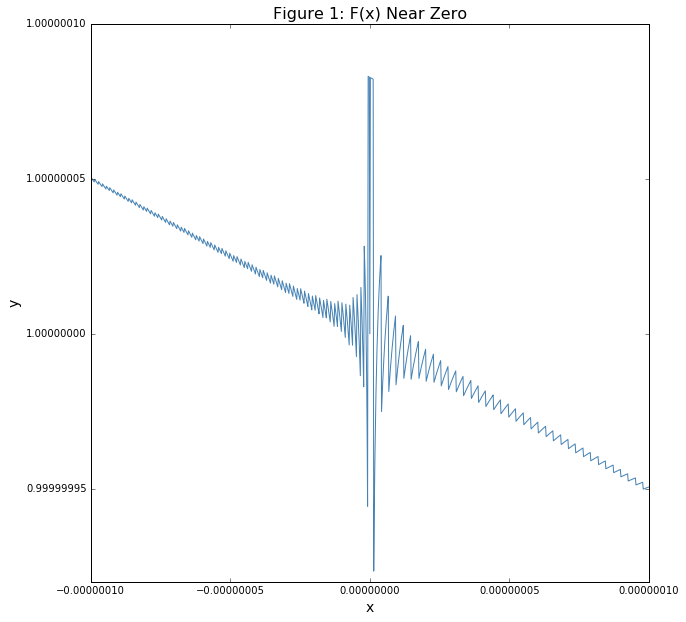

In [10]:
endValue=1e-7
figure(figsize=(10,10))
title('Figure 1: F(x) Near Zero', fontsize='16')
xlabel('x', fontsize='14')
ylabel('y', fontsize='14')
plt.ticklabel_format(useOffset=False, style='plain')
x=linspace(-endValue,endValue, 1001)
y=where(x==0, 1.0, log(1+x)/x)
plot(x,y, color='steelblue');

**Figure 1** is the plot of F(x) near zero.  As x approaches zero, the function oscillates with oscillations of increasing magnitude, with the largest oscillations occuring at y=1, which is the point of discontinuity in F(x).

When F(x) is evaluated, there isn't any problem with the precision in the denominator.  However, the machine epsilon, 1+x, becomes truncated in some range to the same machine number.  Eventually, the numerator "catches up" with the denominator and a jump in the graph occurs.  The jumps in the graph are when the last digit of the epsilon is 5, because it is then rounded up when truncated.  When the graph is zoomed in more (see **Figure 2** below), it becomes evident that the jumps form the graph $\frac{1}{x}$.

C:\Users\Jillian\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: invalid value encountered in true_divide


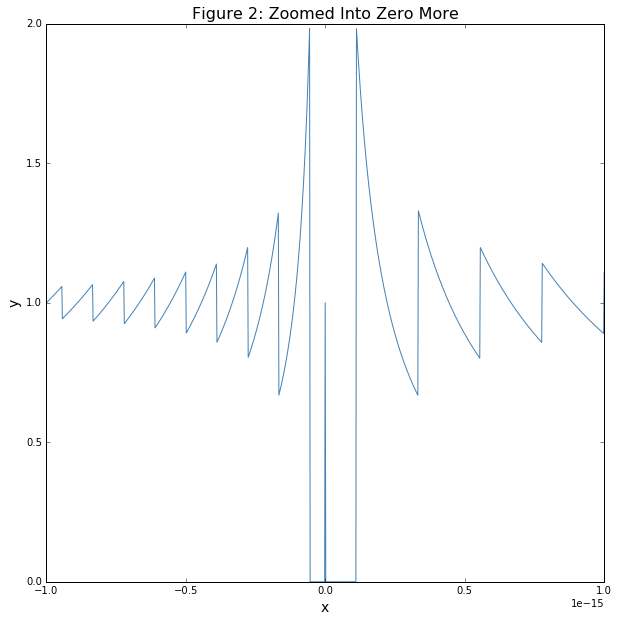

In [11]:
endValue=1e-15
figure(figsize=(10,10))
title('Figure 2: Zoomed Into Zero More', fontsize='16')
xlabel('x', fontsize='14')
ylabel('y', fontsize='14')
x=linspace(-endValue,endValue, 1001)
y=where(x==0, 1.0, log(1+x)/x)
plot(x,y, color='steelblue');

**Figure 2** is the graph of F(x) zoomed into zero even more due to the endValue being equal to $1*10^{-15}$.  The curved part of the jumps in the graph are more visible, and as mentioned above, they look like the graph $\frac{1}{x}$.

#### Exercise 5: Plotting the Taylor Series for F(x)

For this exercise, we will plot and extend the Taylor Series Approximation for F(x).  The general form of the Taylor Series is

$$f(x)=f(0)+f'(0)x+(\frac{f''(0)}{2!})x^2+(\frac{f'''(0)}{3!})x^3+(\frac{f^4(0)}{4!})x^4+...$$

The approximation for log(1+x), extended by one more term, is:

$$f(x)=x-\frac{x^2}{2}+\frac{x^3}{3}-\frac{x^4}{4}+R5$$ 

where $$R5=\frac{x^5}{5(1+x_i)^5}$$

To get the approximation for F(x), we divide the log(1+x) approximation by x:

$$f(x)=1-\frac{x}{2}+\frac{x^2}{3}-\frac{x^3}{4}+R5$$

where $$R5=\frac{x^4}{5(1+x_i)^5}$$

We then plot F(x) and its Taylor Series on the same graph.  The Taylor approximation (defined as z below) plotted does not contain the R5 term.

C:\Users\Jillian\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: invalid value encountered in true_divide


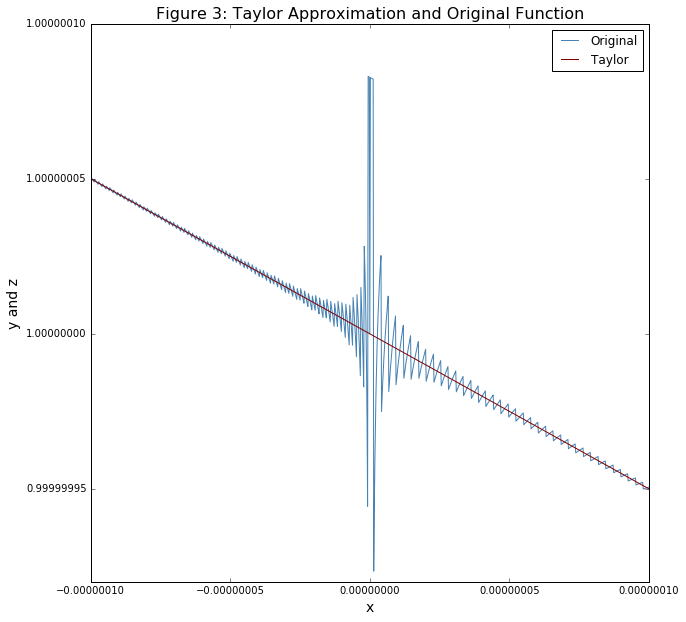

In [12]:
end = 1e-7
figure(figsize=(10,10))
title('Figure 3: Taylor Approximation and Original Function', fontsize='16')
xlabel('x', fontsize='14')
ylabel('y and z', fontsize='14')
plt.ticklabel_format(useOffset=False, style='plain')
x = linspace(-end,end,1001)
y = where(x==0, 1.0, log(1+x)/x)
z=1-((x)/2)+((x**2)/3)-((x**3)/4)
plot(x,y, color='steelblue', label='Original')
plot(x,z, color='maroon', label='Taylor')
legend();

**Figure 3** is the plot of both the original function and its Taylor Series.  The Taylor Series eliminates the oscillations in the original function and creates a smooth, straight line as x approaches zero.  The line appears to go through the middle of each oscillation.

#### Exercise 6: Find How Big |x| Can Be

In this final exercise, we want |R5| in the Taylor approximation to be less than $10^{-16}$.  We let $x_i=0$, so that R5 has the simplest denominator. 

$$R5=\frac{x^4}{5(1+0)^5}=\frac{x^4}{5}$$

If |R5| must be less than $10^{-16}$, we must solve the inequality

$$\lvert \frac{x^4}{5} \rvert < 10^{-16}$$

or,

$$x<(5*10^{-16})^{\frac{1}{4}}$$

In [13]:
x=(5*10**-16)**(1/4)
print(x) #when x is less than this number

0.00014953487812212205


|R5| is less than $10^{-16}$ when x equals $1.495*10^{-4}$.

### Conclusion

In this report, the various parameters of the IEEE floating point system were determined.  Then, the function $\frac{log(1+x)}{x}$ was plotted, and the oscillation pattern around x=0 was discovered and discussed.  Next, its Taylor approximation was determined and was plotted on the same graph as the original function.  Finally, it was determined how big |x| could be without going above an error of $10^{-16}$.

### References

1. Get rid of axis overflow: http://stackoverflow.com/questions/28371674/prevent-scientific-notation-in-matplotlib-pyplot

2. Vertical bars syntax: http://tex.stackexchange.com/questions/498/mid-vertical-bar-vert-lvert-rvert-divides

3. Floating Point: https://en.wikipedia.org/wiki/IEEE_floating_point